<a href="https://colab.research.google.com/github/marshytina/ChaseGame/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled0_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from keras.utils import plot_model

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle


In [ ]:
import random
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
f1 = open('/content/drive/MyDrive/output.csv', 'r')
train_df = pd.read_csv(f1)
train_df = train_df.sample(frac=1) # перемешивание


columns = ["label"] + [f'pixel{i}' for i in range(1, 4097)]

train = pd.DataFrame(train_df.iloc[:17000], columns=columns)
test = pd.DataFrame(train_df.iloc[17000:], columns=columns) # поставь свои цифры, в данном случае в train 17000, а в test 8291

train.to_csv('trainn.csv', index=False)
test.to_csv('testt.csv', index=False) # тут напиши свои названия

In [ ]:
f1 = open('trainn.csv', 'r')

In [ ]:
# loading the training data (X+y)
train_df = pd.read_csv(f1)

In [ ]:
 train_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,pixel4096
0,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df = train_df.sample(frac=1, random_state=42) # Shuffiling the entire dataset
X, y = train_df.drop('label', axis=1), train_df['label'] # Split the dataset into X, y
X.shape, y.shape

((17000, 4096), (17000,))

In [ ]:
np.unique(X.dtypes), y.dtype

(array([dtype('int64')], dtype=object), dtype('int64'))

In [ ]:
label_binarizer = LabelBinarizer() # Binarize labels in a one-vs-all fashion (return one-hot encoded vectors)
y = label_binarizer.fit_transform(y)

In [ ]:
X = X/255.0 # Normalizing the training data and converting the data type to float
np.unique(X.dtypes)

array([dtype('float64')], dtype=object)

In [ ]:
# Converting the 1-D array of 784 pixels to (28, 28, 1) Image
# (28, 28) represents the spatial dimensions of the image & 1 specifies that the image is grayscale
X = tf.reshape(X, [-1, 64, 64, 1])

In [ ]:
X.shape, y.shape

(TensorShape([17000, 64, 64, 1]), (17000, 36))

(<matplotlib.image.AxesImage at 0x7b4c3e950fd0>,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]))

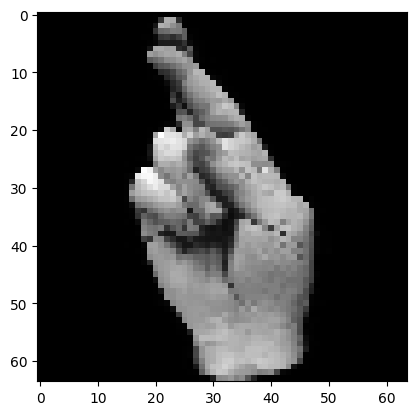

In [ ]:
plt.imshow(X[0], cmap="grey"), y[0]

In [ ]:
# Generating a validation set

X_train, X_valid = X[:15000], X[15000:]
y_train, y_valid = y[:15000], y[15000:]

In [ ]:
X_train[1].dtype

tf.float64

In [ ]:
X_train[0].shape

TensorShape([64, 64, 1])

(<matplotlib.image.AxesImage at 0x7b4c3e078f10>,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]))

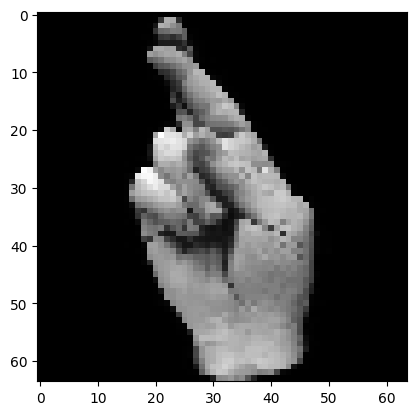

In [ ]:
plt.imshow(X[0], cmap='gray'), y[0]

In [ ]:
#Defining the CNN

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(64, 64, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(36, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,412,836 (5.39 MB)

 Trainable params: 1,412,836 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

save_best_cb = keras.callbacks.ModelCheckpoint('/content/initial.keras', save_best_only=True) # Сохраняет лучшую модель
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5) # Останавливает обучение, если нет прогресса

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.2237 - loss: 2.7127 - val_accuracy: 0.8190 - val_loss: 0.5169
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7118 - loss: 0.7680 - val_accuracy: 0.8830 - val_loss: 0.2940
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8175 - loss: 0.4919 - val_accuracy: 0.9235 - val_loss: 0.1962
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8457 - loss: 0.3936 - val_accuracy: 0.9345 - val_loss: 0.1677
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8647 - loss: 0.3339 - val_accuracy: 0.9420 - val_loss: 0.1453
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8755 - loss: 0.3039 - val_accuracy: 0.9415 - val_loss: 0.1360
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8856 - loss: 0.2910 - val_accuracy: 0.9445 - val_loss: 0.1233
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8922 - loss: 0.2615 - val_a

In [ ]:
history.history # Contains the training related information for each epoch

{'accuracy': [0.4179333448410034,
  0.7411333322525024,
  0.8202000260353088,
  0.8444666862487793,
  0.8655999898910522,
  0.8757333159446716,
  0.8877999782562256,
  0.8967333436012268,
  0.9046666622161865,
  0.910266637802124,
  0.9157333374023438,
  0.9204666614532471,
  0.9268666505813599,
  0.9314666390419006,
  0.9335333108901978,
  0.9409999847412109,
  0.9417333602905273,
  0.9448000192642212,
  0.9476666450500488,
  0.9466000199317932],
 'loss': [1.8963297605514526,
  0.6864432692527771,
  0.47704190015792847,
  0.3911585509777069,
  0.3312724828720093,
  0.3037061393260956,
  0.28127816319465637,
  0.2581173777580261,
  0.24115681648254395,
  0.21981976926326752,
  0.2120547890663147,
  0.19459117949008942,
  0.18138079345226288,
  0.17324507236480713,
  0.17016996443271637,
  0.15302443504333496,
  0.15202432870864868,
  0.14425943791866302,
  0.14418476819992065,
  0.1377987116575241],
 'val_accuracy': [0.8190000057220459,
  0.8830000162124634,
  0.9235000014305115,
  0.9

In [ ]:
# Saving the history object

with open('/content/intial-history', 'wb') as history_file:
  pickle.dump(history.history, history_file)

In [ ]:
h = np.load('/content/intial-history', allow_pickle=True)
h

{'accuracy': [0.4179333448410034,
  0.7411333322525024,
  0.8202000260353088,
  0.8444666862487793,
  0.8655999898910522,
  0.8757333159446716,
  0.8877999782562256,
  0.8967333436012268,
  0.9046666622161865,
  0.910266637802124,
  0.9157333374023438,
  0.9204666614532471,
  0.9268666505813599,
  0.9314666390419006,
  0.9335333108901978,
  0.9409999847412109,
  0.9417333602905273,
  0.9448000192642212,
  0.9476666450500488,
  0.9466000199317932],
 'loss': [1.8963297605514526,
  0.6864432692527771,
  0.47704190015792847,
  0.3911585509777069,
  0.3312724828720093,
  0.3037061393260956,
  0.28127816319465637,
  0.2581173777580261,
  0.24115681648254395,
  0.21981976926326752,
  0.2120547890663147,
  0.19459117949008942,
  0.18138079345226288,
  0.17324507236480713,
  0.17016996443271637,
  0.15302443504333496,
  0.15202432870864868,
  0.14425943791866302,
  0.14418476819992065,
  0.1377987116575241],
 'val_accuracy': [0.8190000057220459,
  0.8830000162124634,
  0.9235000014305115,
  0.9

In [ ]:
best_model = keras.models.load_model('/content/initial.keras') # Model with best set of parameters not necessarily the model at the last epoch of training

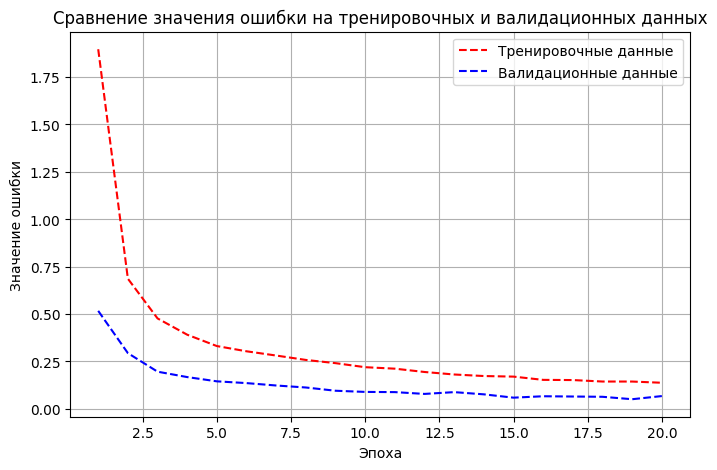

In [ ]:
plt.figure(figsize=(8, 5))
n_epochs = len(h['loss'])
plt.plot(range(1, n_epochs+1), h['loss'], color='red', label="Тренировочные данные", linestyle='--')
plt.plot(range(1, n_epochs+1), h['val_loss'], color='blue', label="Валидационные данные", linestyle='--')
plt.title("Сравнение значения ошибки на тренировочных и валидационных данных")
plt.xlabel("Эпоха")
plt.ylabel("Значение ошибки")
plt.legend()
plt.grid()
plt.show()

#ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
#ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='c', label='val_accuracy', linestyle='--')
#ax.set_xticks(range(1, n_epochs+1))
#ax.legend()


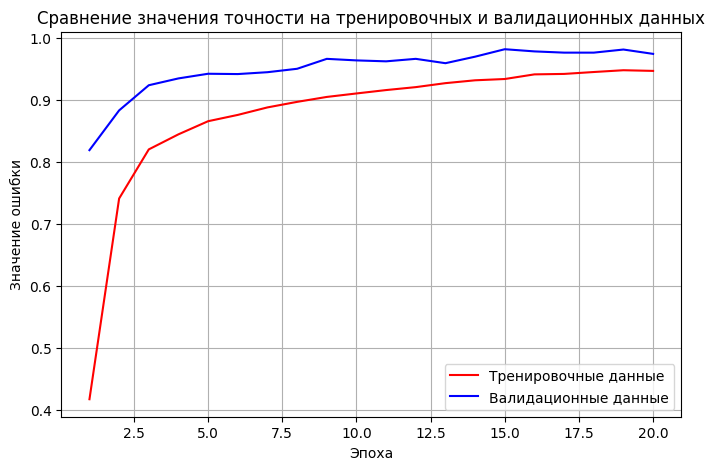

In [ ]:
plt.figure(figsize=(8, 5))
n_epochs = len(h['loss'])
plt.plot(range(1, n_epochs+1), h['accuracy'], color='red', label='Тренировочные данные')
plt.plot(range(1, n_epochs+1), h['val_accuracy'], color='blue', label='Валидационные данные')
plt.title("Сравнение значения точности на тренировочных и валидационных данных")
plt.xlabel("Эпоха")
plt.ylabel("Значение ошибки")
plt.legend()
plt.grid()
plt.show()


In [ ]:
drive.mount('/content/drive')

filename2 ='/content/drive/MyDrive/testt.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
f2 = open('/content/testt.csv', 'r')

In [ ]:
# loading the training data (X+y)
test_df = pd.read_csv('/content/testt.csv')

In [ ]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [ ]:
X_test = tf.reshape(X_test, [-1, 64, 64, 1])

In [ ]:
y_test = label_binarizer.transform(y_test)
X_test.shape, y_test.shape

(TensorShape([8291, 64, 64, 1]), (8291, 36))

In [ ]:
best_model.evaluate(X_test, y_test)

260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9714 - loss: 12.0989


[12.388323783874512, 0.9704498648643494]

In [ ]:
# Preprocesses the input and evaluates the model

def evaluate_model(model, X_test, y_test, label_binarizer):
    X_test_reshape = tf.reshape(X_test, [-1, 64, 64, 1])
    y_test_labels = label_binarizer.transform(y_test)
    results = model.evaluate(X_test_reshape, y_test_labels)
    print(f'Loss: {results[0]:.3f} Accuracy: {results[1]:.3f}')

In [ ]:
results = evaluate_model(best_model, test_df.drop('label', axis=1), test_df['label'], label_binarizer)

260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9714 - loss: 12.0989
Loss: 12.388 Accuracy: 0.970


In [ ]:
d_nums = {chr(ord('0') + i):i for i in range(10)}
d_nums_rev = {i:chr(ord('0') + i) for i in range(10)}
d_letters = {chr(ord('a') + i):i+10 for i in range(37)}
d_letters_rev = {i+10:chr(ord('a') + i) for i in range(37)}

d = {**d_nums, **d_letters}
d_rev = {**d_nums_rev, **d_letters_rev}
d[' '] = d_rev[' '] = ' '

In [ ]:
sentence = 'sign language'

for i in sentence:
    print(d[i], end=' ')

28 18 16 23   21 10 23 16 30 10 16 14 

In [ ]:
best_model.predict(tf.reshape(X_test[0], [-1, 64, 64, 1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


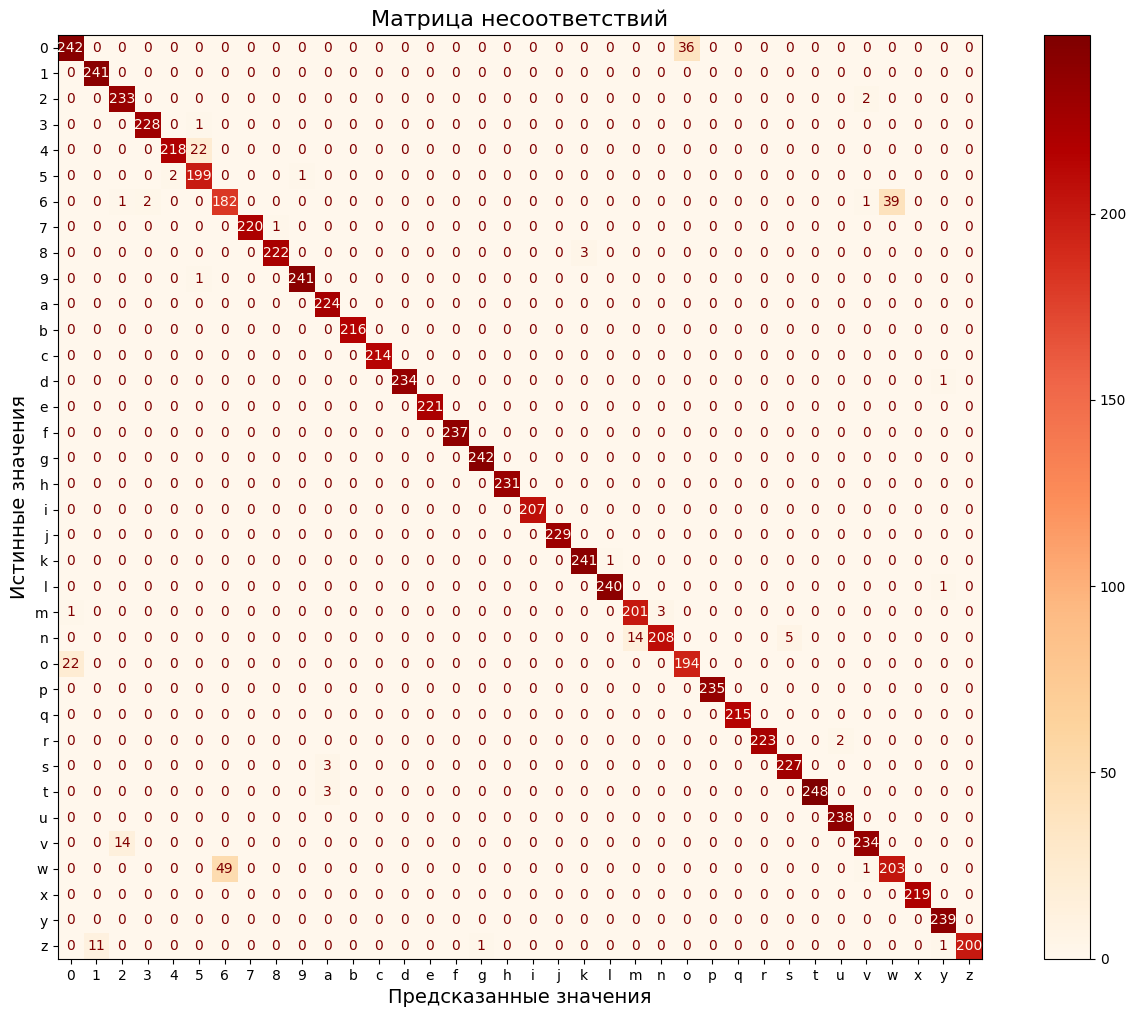

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = []
labels_string = '0123456789abcdefghijklmnopqrstuvwxyz'
for i in labels_string:
    labels.append(d_rev[d[i]])

y_pred = best_model.predict(X_test)

# Convert y_test and y_pred to class labels using argmax
y_test_cn = np.argmax(y_test, axis=1)  # Convert from one-hot to class labels
pred_y = np.argmax(y_pred, axis=1)  # Convert from one-hot to class labels

cm = confusion_matrix(y_test_cn, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(16, 12))
disp.plot(cmap="OrRd", ax=ax, )
ax.set_xlabel("Предсказанные значения", fontsize=14)
ax.set_ylabel("Истинные значения", fontsize=14)
plt.title("Матрица несоответствий", fontsize=16) # Confusion Matrix
plt.show()

In [ ]:
images_taken = []
result = ''

for i in sentence:
    if i != ' ':
        char_index=np.random.choice(np.where(np.argmax(y_test, axis = 1) == d[i])[0])
        images_taken.append(char_index)
        y_pred = best_model.predict(tf.reshape(X_test[char_index], [-1, 64, 64, 1]))
        pred_label = label_binarizer.inverse_transform(y_pred)[0]
        result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
    else:
        result += ' '
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
sign language


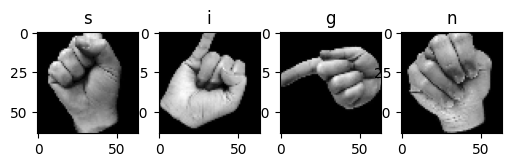

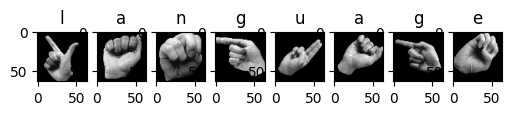

In [ ]:
# Visualizing the test images
images_taken_dup = list(reversed(images_taken))
for word in sentence.split():
    fig, ax = plt.subplots(1, len(word), figsize=(6, 6))
    for i in range(len(word)):
        ax[i].imshow(X_test[images_taken_dup.pop()], cmap='gray')
        ax[i].set_title(word[i])

In [ ]:
def test_on_sentence(model, sentence, X_test, y_test, label_binarizer, figsize=(20, 20)):
    # Random images are taken from X_test along with the corresponding labels in y_test
    # based on the letters in the sentence.
    # These images are fed to the model and its output is printed

    sentence = sentence.lower()

    d_nums = {chr(ord('0') + i):i for i in range(10)}
    d_nums_rev = {i:chr(ord('0') + i) for i in range(10)}
    d_letters = {chr(ord('a') + i):i+10 for i in range(37)}
    d_letters_rev = {i+10:chr(ord('a') + i) for i in range(37)}

    d = {**d_nums, **d_letters}
    d_rev = {**d_nums_rev, **d_letters_rev}
    d[' '] = d_rev[' '] = ' '


    images_taken = []
    result = ''

    X_test_reshape = tf.reshape(X_test, [-1, 64, 64, 1])


    for i in sentence:
        if i != ' ':
            char_index=np.random.choice(np.where(np.argmax(y_test, axis=1) == d[i])[0])
            #char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
            images_taken.append(char_index)
            y_pred = model.predict(tf.reshape(X_test_reshape[char_index], [1, 64, 64, 1]))
            result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
        else:
            result += ' '

    print(f'The actual sentence is "{sentence}"')
    print(f'The predicted sentence is "{result}"')

    images_taken.reverse()
    for word in sentence.split():
        fig, ax = plt.subplots(1, len(word), figsize=(10, 10))
        for i in range(len(word)):
            ax[i].imshow(X_test_reshape[images_taken.pop()], cmap='gray')
            ax[i].set_title(word[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
The actual sentence is "36 classes"
The predicted sentence is "36 classes"


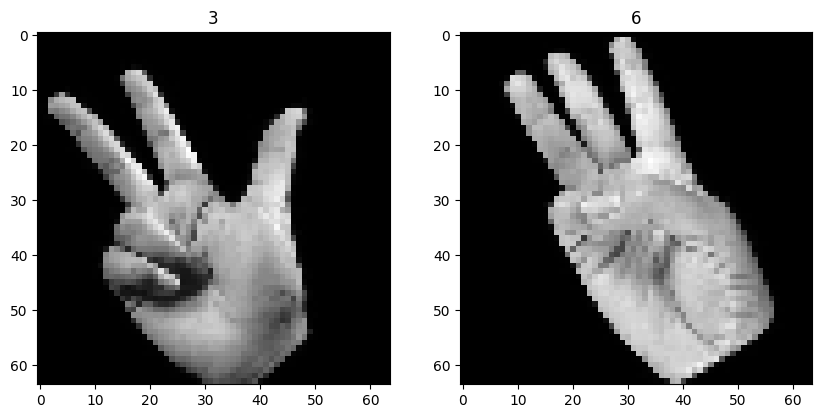

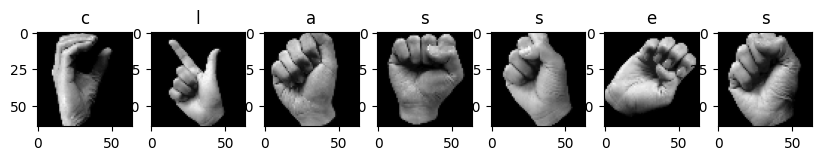

In [ ]:
test_on_sentence(best_model, '36 classes', X_test, y_test, label_binarizer)

In [ ]:
X_train, X_valid = X[:13500], X[13500:]
y_train, y_valid = y[:13500], y[13500:]

In [ ]:
# Models
# 'models/experiment-1-1'
# 'models/experiment-1-2'
# 'models/experiment-1-3'

# History objects
# 'models/experiment-1-1-history'
# 'models/experiment-1-2-history'
# 'models/experiment-1-3-history'

n_pairs = 3
models_pairs = [keras.models.Sequential() for i in range(n_pairs)]
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

for n in range(1, n_pairs+1):
    models_pairs[n-1].add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    for i in range(1, n):
        models_pairs[n-1].add(keras.layers.Conv2D(32*(i+1), (5, 5), padding='same', activation='relu'))
        models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    models_pairs[n-1].add(keras.layers.Flatten())
    models_pairs[n-1].add(keras.layers.Dense(128, activation='relu'))
    models_pairs[n-1].add(keras.layers.Dense(36, activation='softmax'))
    models_pairs[n-1].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-1-{n}.keras', save_best_only=True)
    history = models_pairs[n-1].fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-1-{n}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.4228 - loss: 2.0415 - val_accuracy: 0.8146 - val_loss: 0.5507
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.8553 - loss: 0.4253 - val_accuracy: 0.8926 - val_loss: 0.3215
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9228 - loss: 0.2340 - val_accuracy: 0.9189 - val_loss: 0.2169
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9465 - loss: 0.1547 - val_accuracy: 0.9337 - val_loss: 0.1765
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9646 - loss: 0.1094 - val_accuracy: 0.9417 - val_loss: 0.1653
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9643 - loss: 0.0956 - val_accuracy: 0.9563 - val_loss: 0.1279
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9784 - loss: 0.0655 - val_accuracy: 0.9580 - val_loss: 0.1237
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9837 - loss: 0.0496 - 

In [ ]:
for index in range(n_pairs):
    model = keras.models.load_model(f'models/experiment-1-{index+1}.keras')
    model.evaluate(X_valid, y_valid)


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9767 - loss: 0.0715
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9831 - loss: 0.0506
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9782 - loss: 0.0659


In [ ]:
h_1_1 = np.load('models/experiment-1-1-history', allow_pickle=True)
h_1_2 = np.load('models/experiment-1-2-history', allow_pickle=True)
h_1_3 = np.load('models/experiment-1-3-history', allow_pickle=True)


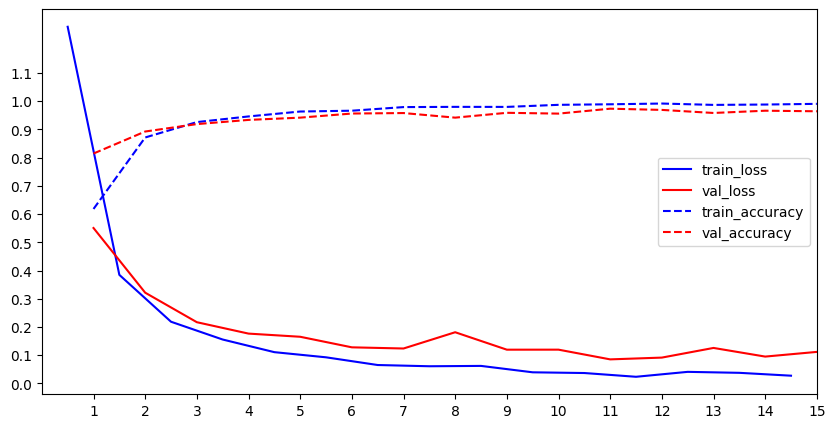

In [ ]:
get_train_val_plots(h_1_1, yticks=np.arange(0, 1.2, 0.1))

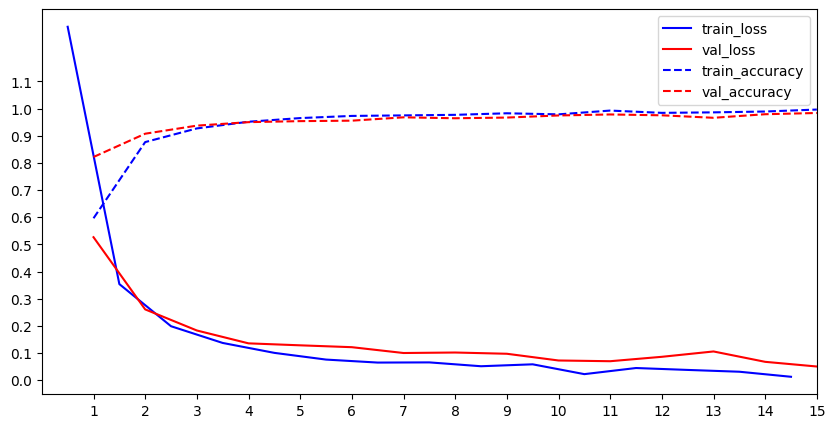

In [ ]:
get_train_val_plots(h_1_2, yticks=np.arange(0, 1.2, 0.1))

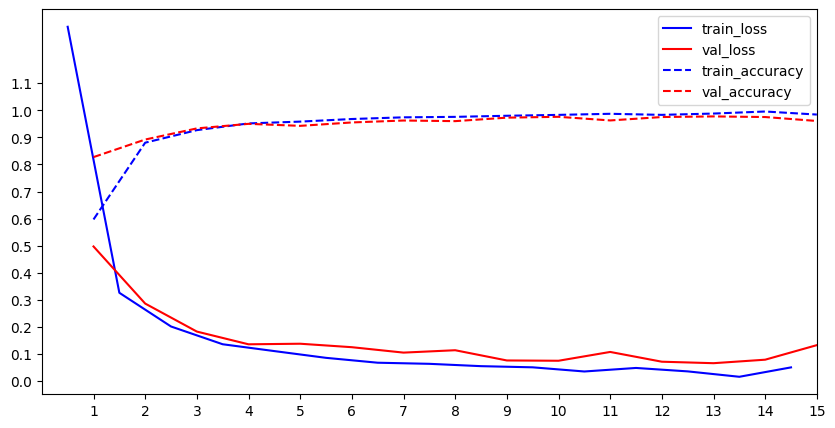

In [ ]:
get_train_val_plots(h_1_3, yticks=np.arange(0, 1.2, 0.1))

In [ ]:
# Models
# 'models/experiment-fmaps-1'
# 'models/experiment-fmaps-2'
# 'models/experiment-fmaps-3'

# History objects
# 'models/experiment-fmaps-1-history'
# 'models/experiment-fmaps-2-history'
# 'models/experiment-fmaps-3-history'

n_tests = 3

models = []
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)


for i in range(n_tests):
    model = keras.models.Sequential()
    models.append(model)
    model.add(keras.layers.Input(shape=(28, 28, 1)))
    for pairs in range(3):
        model.add(keras.layers.Conv2D((8*(i+1))*(2**pairs), (5, 5), padding='same', activation='relu'))
        model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(36, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-fmaps-{i+1}.keras', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-fmaps-{i+1}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.2674 - loss: 2.5500 - val_accuracy: 0.7066 - val_loss: 0.8152
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.7723 - loss: 0.6520 - val_accuracy: 0.8617 - val_loss: 0.4113
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8733 - loss: 0.3513 - val_accuracy: 0.8971 - val_loss: 0.2874
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9156 - loss: 0.2313 - val_accuracy: 0.8937 - val_loss: 0.3006
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9229 - loss: 0.2038 - val_accuracy: 0.9149 - val_loss: 0.2503
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9389 - loss: 0.1648 - val_accuracy: 0.9011 - val_loss: 0.2822
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9436 - loss: 0.1484 - val_accuracy: 0.9480 - val_loss: 0.1382
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9592 - loss: 0.1097 - 

In [ ]:
for index in range(n_tests):
    model = keras.models.load_model(f'models/experiment-fmaps-{index+1}.keras')
    model.evaluate(X_valid, y_valid)


110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9526 - loss: 0.1292
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9591 - loss: 0.1133
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9764 - loss: 0.0750


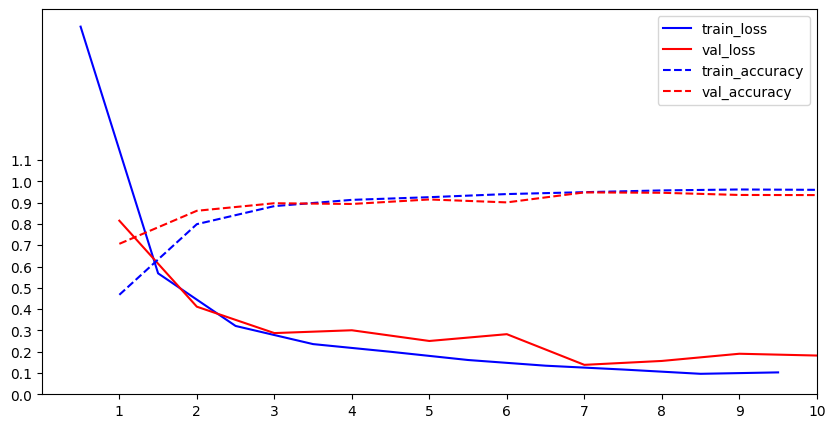

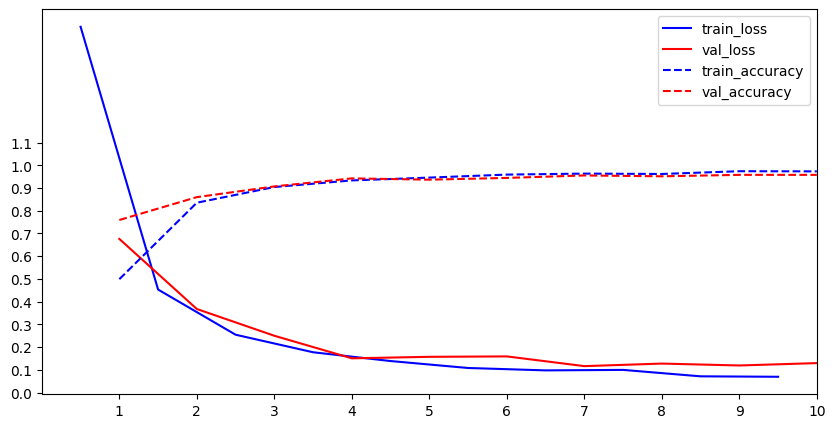

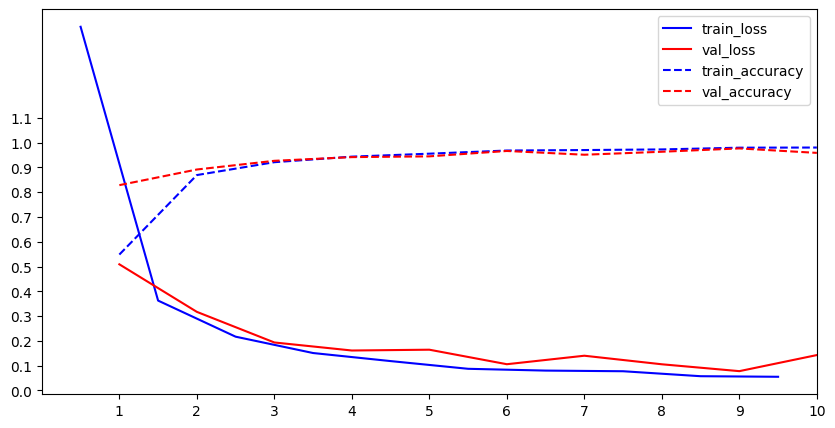

In [ ]:
h_2_1 = np.load('models/experiment-fmaps-1-history', allow_pickle=True)
h_2_2 = np.load('models/experiment-fmaps-2-history', allow_pickle=True)
h_2_3 = np.load('models/experiment-fmaps-3-history', allow_pickle=True)

get_train_val_plots(h_2_1, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_2, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_3, yticks=np.arange(0, 1.2, 0.1))


In [ ]:
# Models
# 'models/experiment-fiters-1'

# History objects
# 'models/experiment-filters-1-history'

save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-fiters-1.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(24, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(48, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(96, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(36, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
with open(f'models/experiment-filters-1-history', 'wb') as history_file:
    pickle.dump(history.history, history_file)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.2819 - loss: 2.4675 - val_accuracy: 0.7694 - val_loss: 0.6518
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.8133 - loss: 0.5267 - val_accuracy: 0.8211 - val_loss: 0.4641
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.8815 - loss: 0.3171 - val_accuracy: 0.8963 - val_loss: 0.2819
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9182 - loss: 0.2153 - val_accuracy: 0.9163 - val_loss: 0.2129
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9451 - loss: 0.1498 - val_accuracy: 0.9294 - val_loss: 0.1973
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9502 - loss: 0.1215 - val_accuracy: 0.9414 - val_loss: 0.1390
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9654 - loss: 0.0898 - val_accuracy: 0.9417 - val_loss: 0.1415
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9622 - loss: 0.1004 - 

In [ ]:
model = keras.models.load_model('models/experiment-fiters-1.keras')
model.evaluate(X_valid, y_valid)


110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9658 - loss: 0.0811


[0.09371545165777206, 0.9637143015861511]

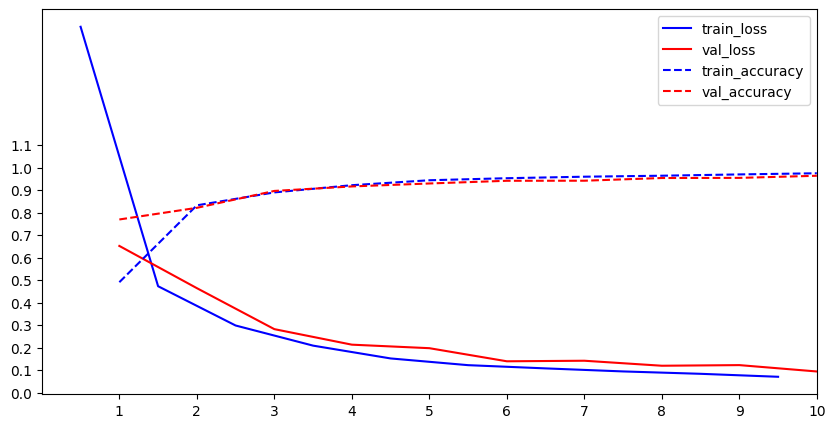

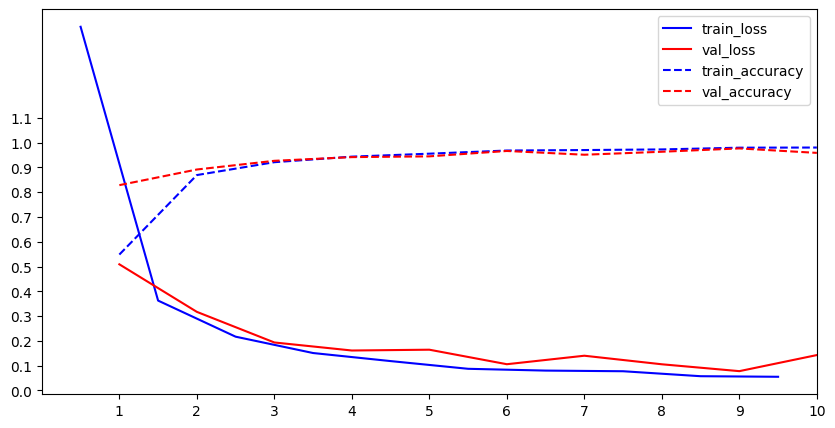

In [ ]:
h_2_3 = np.load('models/experiment-fmaps-3-history', allow_pickle=True)
h = np.load('models/experiment-filters-1-history', allow_pickle=True)
get_train_val_plots(h, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_3, yticks=np.arange(0, 1.2, 0.1))


In [ ]:
# Models
# 'models/experiment-dropout-0'
# 'models/experiment-dropout-1'
# 'models/experiment-dropout-2'

# History objects
# 'models/experiment-dropout-0-history'
# 'models/experiment-dropout-1-history'
# 'models/experiment-dropout-2-history'

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

dropout_rates = [0.3, 0.4, 0.5]

for index, i in enumerate(dropout_rates):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(24, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(48, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(96, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Dense(36, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-dropout-{index}.keras', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-dropout-{index}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.1517 - loss: 2.9804 - val_accuracy: 0.7440 - val_loss: 0.8490
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - accuracy: 0.6381 - loss: 1.0324 - val_accuracy: 0.8591 - val_loss: 0.4290
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 95ms/step - accuracy: 0.7651 - loss: 0.6388 - val_accuracy: 0.8949 - val_loss: 0.3019
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - accuracy: 0.8169 - loss: 0.4887 - val_accuracy: 0.9229 - val_loss: 0.2134
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 88ms/step - accuracy: 0.8483 - loss: 0.3955 - val_accuracy: 0.9294 - val_loss: 0.1964
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.8587 - loss: 0.3614 - val_accuracy: 0.9389 - val_loss: 0.1585
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - accuracy: 0.8815 - loss: 0.3026 - val_accuracy: 0.9380 - val_loss: 0.1509
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - accuracy: 0.8918 - loss: 0.2708 - 

In [ ]:
for index in range(3):
    model = keras.models.load_model(f'models/experiment-dropout-{index}.keras')
    model.evaluate(X_valid, y_valid)

110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9574 - loss: 0.1104
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9251 - loss: 0.1774
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9026 - loss: 0.2843


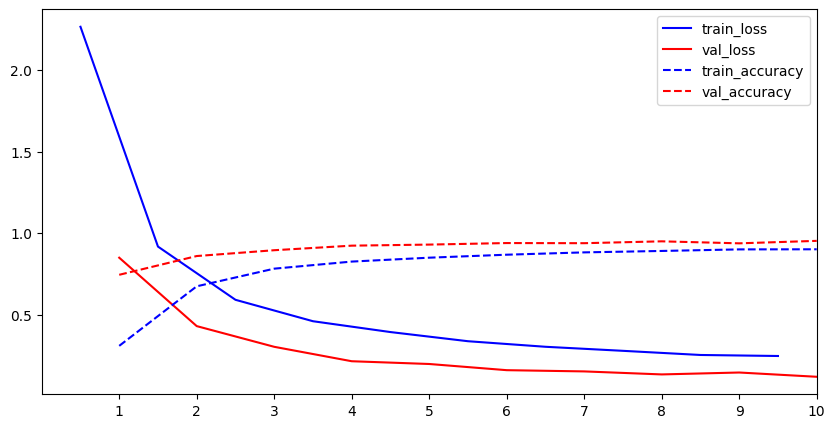

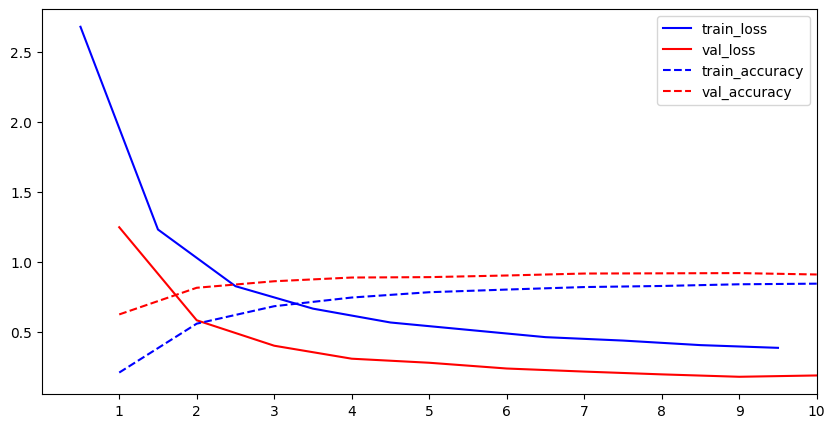

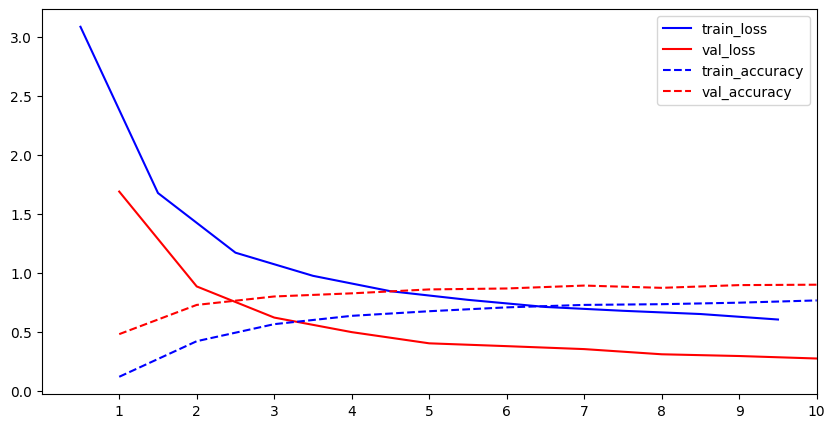

In [ ]:
h_0 = np.load('models/experiment-dropout-0-history', allow_pickle=True)
h_1 = np.load('models/experiment-dropout-1-history', allow_pickle=True)
h_2 = np.load('models/experiment-dropout-2-history', allow_pickle=True)

get_train_val_plots(h_0)
get_train_val_plots(h_1)
get_train_val_plots(h_2)




In [ ]:
# Sample Code

data_augmentation = keras.models.Sequential()
data_augmentation.add(keras.layers.RandomRotation(0.1, fill_mode='nearest', input_shape=(28, 28, 1)))
data_augmentation.add(keras.layers.RandomZoom((0.15, 0.2), fill_mode='nearest'))
data_augmentation.add(keras.layers.RandomTranslation(0.1, 0.1, fill_mode='nearest'))

model = keras.models.Sequential()
# Add the layers from the above model


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
